# Selección de datos. CCAA: Euskadi

In [6]:
import pandas as pd
import os
import json
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Import libraries for training the models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib


In [2]:
path = "C:/Users/TheBridge/Desktop/Desafio_Reto2/data/"


# Selección de datos: Dataset-Combustible

+ Descargamos los datos del tipo de combustible y sus características desde el [Geoportal de gasolineras](https://geoportalgasolineras.es/geoportal-instalaciones/Inicio). Inicialmente, el conjunto de datos comprendía desde 2007 a 2024 para todas las comunidades autónomas. Seleccionamos solo los datos correspondientes al periodo 2022 a 2024 y a la comunidad autónoma de Euskadi.

In [ ]:
# Rango de valores 
años = [str(año) for año in range(2022, 2025)]   # 2022 a 2025
meses = [f"{i:02d}" for i in range(1, 13)]       # '01' a '12'

# Carpeta donde guardar los nuevos archivos
datos_combinados = []

# Recorremos todas las combinaciones
for año in años:
        for mes in meses:
            ruta = os.path.join(path, año, mes)
            
            if os.path.exists(ruta):
                archivos = os.listdir(ruta)
                archivos_json = [f for f in archivos if f.endswith('.json')]
                
                if archivos_json:
                    print(f"Procesando carpeta: {ruta} - {len(archivos_json)} archivos JSON")
                
                for archivo in archivos:
                    if archivo.endswith('.json'):
                        ruta_archivo = os.path.join(ruta, archivo)
                        try:
                            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                                contenido = json.load(f)
                                
                                # Check if the JSON structure has 'ListaEESSPrecio' (your original format)
                                if 'ListaEESSPrecio' in contenido:
                                    fecha = contenido.get('Fecha', '')
                                    for estacion in contenido['ListaEESSPrecio']:
                                        # Create a new dictionary for each gas station
                                        nuevo = {'Fecha': fecha}  # Add the date first
                                        
                                        # Extract all fields from each station
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        
                                        datos_combinados.append(nuevo)
                                
                                # Check if the JSON is a list of stations (alternative format)
                                elif isinstance(contenido, list):
                                    # Extract date from filename if not in content
                                    fecha_archivo = archivo.replace('.json', '')
                                    for estacion in contenido:
                                        nuevo = {'Fecha': fecha_archivo}
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        datos_combinados.append(nuevo)
                                
                                # Check if it's a single station object
                                elif isinstance(contenido, dict) and any(key.startswith('Precio') for key in contenido.keys()):
                                    fecha_archivo = archivo.replace('.json', '')
                                    nuevo = {'Fecha': fecha_archivo}
                                    for clave, valor in contenido.items():
                                        nuevo[clave] = valor
                                    datos_combinados.append(nuevo)
                                
                                else:
                                    print(f"Formato JSON no reconocido en {ruta_archivo}")
                                    print(f"Claves encontradas: {list(contenido.keys()) if isinstance(contenido, dict) else 'No es diccionario'}")
                                        
                        except Exception as e:
                            print(f"Error leyendo {ruta_archivo}: {e}")
            # Removed the "Ruta no existe" message to reduce console output

# Convertir la lista de diccionarios en un DataFrame
if datos_combinados:
    df = pd.DataFrame(datos_combinados)
    
    # Guardar como CSV
    output_path = os.path.join(path, 'datos_combinados_combustibleEuskadi2022-2025.csv')
    df.to_csv(output_path, index=False, encoding='utf-8')
    
    print(f"Total de registros combinados: {len(datos_combinados)}")
    print(f"Archivo guardado en: {output_path}")
    print(f"Columnas en el CSV: {list(df.columns)}")
else:
    print("No se encontraron datos para procesar.")

Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\01 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\02 - 28 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\03 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\04 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\05 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\06 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\07 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\08 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/D

In [5]:
df_combustible = pd.read_csv(path + "datos_combinados_combustibleEuskadi2022-2025.csv")
df_combustible.head()

C:\Users\TheBridge\AppData\Local\Temp\ipykernel_10400\285068925.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combustible = pd.read_csv(path + "datos_combinados_combustibleEuskadi2022-2025.csv")


,Fecha,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Adblue,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
0,01/01/2022 0:00:00,1240,"CL MANISITU, 9",L-D: 24H,"42,846028",ALEGRIA-DULANTZI,"-2,509361",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,"PREMIRA ENERGIA NORTE, S.L.",P,"0,0","0,0",9381,1,1,16
1,01/01/2022 0:00:00,1240,"CALLE GASTEIZBIDEA, 59",L-D: 07:00-22:00,"42,842917",ALEGRIA-DULANTZI,"-2,519194",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,ES DULANTZI REPSOL,P,"0,0","0,0",14209,1,1,16
2,01/01/2022 0:00:00,1468,"POLIGONO ZANKUETA, 0",L-D: 24H,"43,044333",LARRINBE,"-2,989111",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,ESTACIONES GB,P,"0,0","0,0",13543,2,1,16
3,01/01/2022 0:00:00,1450,"CARRETERA A-624 KM. 37,8",L-D: 06:00-22:00,"43,031889",LEZAMA,"-2,967611",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,MOEVE,P,"0,0","0,0",45,2,1,16
4,01/01/2022 0:00:00,1474,"AVENIDA GARAY, 23",L-D: 06:00-22:00,"43,123361",ARTZINIEGA,"-3,122528",D,Artziniega,NaN,...,ARABA/ÁLAVA,dm,AVIA,P,"0,0","0,0",5,8,1,16


In [6]:
df_combustible.columns

Index(['Fecha', 'C.P.', 'Dirección', 'Horario', 'Latitud', 'Localidad',
       'Longitud (WGS84)', 'Margen', 'Municipio', 'Precio Adblue',
       'Precio Amoniaco', 'Precio Biodiesel', 'Precio Bioetanol',
       'Precio Biogas Natural Comprimido', 'Precio Biogas Natural Licuado',
       'Precio Diésel Renovable', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E10', 'Precio Gasolina 95 E25',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 95 E85', 'Precio Gasolina 98 E10',
       'Precio Gasolina 98 E5', 'Precio Gasolina Renovable',
       'Precio Hidrogeno', 'Precio Metanol', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA'],
      dtype='object')

In [7]:
# Seleccion de columnas del dataset de combustible
columns = ['Dirección', 'Horario','Localidad','Margen', 'Municipio', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA']

df_combustible_precios = df_combustible.drop(columns=columns)

df_combustible_precios.head()

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Adblue,Precio Amoniaco,Precio Biodiesel,Precio Bioetanol,Precio Biogas Natural Comprimido,Precio Biogas Natural Licuado,...,Precio Gasolina 95 E10,Precio Gasolina 95 E25,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 95 E85,Precio Gasolina 98 E10,Precio Gasolina 98 E5,Precio Gasolina Renovable,Precio Hidrogeno,Precio Metanol
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,499",NaN,NaN,NaN,"1,639",NaN,NaN,NaN
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,"1,691",NaN,NaN,NaN
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,525",NaN,NaN,NaN,"1,625",NaN,NaN,NaN


In [8]:
df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  object 
 3   Longitud (WGS84)                    366746 non-null  object 
 4   Precio Adblue                       0 non-null       float64
 5   Precio Amoniaco                     0 non-null       float64
 6   Precio Biodiesel                    3738 non-null    object 
 7   Precio Bioetanol                    1449 non-null    object 
 8   Precio Biogas Natural Comprimido    0 non-null       float64
 9   Precio Biogas Natural Licuado       0 non-null       float64
 10  Precio Diésel Renovable             0 non-null       float64
 11  Precio Gas Natural Comprim

In [9]:
# Eliminamos missing data
df_combustible_precios = df_combustible_precios.dropna(axis = 1, how='all')

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Fecha                               366746 non-null  object
 1   C.P.                                366746 non-null  int64 
 2   Latitud                             366746 non-null  object
 3   Longitud (WGS84)                    366746 non-null  object
 4   Precio Biodiesel                    3738 non-null    object
 5   Precio Bioetanol                    1449 non-null    object
 6   Precio Gas Natural Comprimido       10923 non-null   object
 7   Precio Gas Natural Licuado          7019 non-null    object
 8   Precio Gases licuados del petróleo  38893 non-null   object
 9   Precio Gasoleo A                    358766 non-null  object
 10  Precio Gasoleo B                    62431 non-null   object
 11  Precio Gasoleo Premium              250

In [10]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,"1,379","0,726",NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,"1,419",NaN,NaN,"1,559",NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,"1,439","1,499",NaN,"1,639"
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,"1,429",NaN,"1,495","1,559",NaN,"1,691"
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,"1,395","0,955","1,445","1,525",NaN,"1,625"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,"43,276028","-2,851000",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,NaN,"1,439",NaN,NaN
366742,31/12/2024 0:00:00,48170,"43,280111","-2,852861",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,489",NaN,"1,589",NaN
366743,31/12/2024 0:00:00,48170,"43,293278","-2,896722",NaN,NaN,NaN,NaN,NaN,"1,264",NaN,NaN,"1,329",NaN,NaN
366744,31/12/2024 0:00:00,48160,"43,318583","-2,876444",NaN,NaN,NaN,NaN,"0,949","1,539",NaN,NaN,"1,579",NaN,"1,729"


In [11]:
#Cambio de nombre de la columna
df_combustible_precios = df_combustible_precios.rename(columns={'Longitud (WGS84)': 'Longitud'})

# Cambio del tipo de string a float para las columnas de Latitud y Longitud
df_combustible_precios['Latitud']= df_combustible_precios['Latitud'].str.replace(',', '.').astype(float)
df_combustible_precios['Longitud']= df_combustible_precios['Longitud'].str.replace(',', '.').astype(float)

In [12]:

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  float64
 3   Longitud                            366746 non-null  float64
 4   Precio Biodiesel                    3738 non-null    object 
 5   Precio Bioetanol                    1449 non-null    object 
 6   Precio Gas Natural Comprimido       10923 non-null   object 
 7   Precio Gas Natural Licuado          7019 non-null    object 
 8   Precio Gases licuados del petróleo  38893 non-null   object 
 9   Precio Gasoleo A                    358766 non-null  object 
 10  Precio Gasoleo B                    62431 non-null   object 
 11  Precio Gasoleo Premium    

In [13]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].str.replace(',', '.').astype(float)

In [14]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].fillna(df_combustible_precios['Precio Biodiesel'].mean())
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].fillna(df_combustible_precios['Precio Bioetanol'].mean())
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].fillna(df_combustible_precios['Precio Gas Natural Comprimido'].mean())
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].fillna(df_combustible_precios['Precio Gas Natural Licuado'].mean())
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].fillna(df_combustible_precios['Precio Gases licuados del petróleo'].mean())
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].fillna(df_combustible_precios['Precio Gasoleo A'].mean())
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].fillna(df_combustible_precios['Precio Gasoleo B'].mean())
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].fillna(df_combustible_precios['Precio Gasoleo Premium'].mean())
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].fillna(df_combustible_precios['Precio Gasolina 95 E5'].mean())
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].fillna(df_combustible_precios['Precio Gasolina 95 E5 Premium'].mean())
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].fillna(df_combustible_precios['Precio Gasolina 98 E5'].mean())


In [15]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud,Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,1.791813,1.63908,1.441664,1.404936,0.95078,1.379000,0.726000,1.749672,1.699481,1.761606,1.863838
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,1.791813,1.63908,1.441664,1.404936,0.95078,1.419000,1.356982,1.749672,1.559000,1.761606,1.863838
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.439000,1.499000,1.761606,1.639000
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,1.791813,1.63908,1.441664,1.404936,0.95078,1.429000,1.356982,1.495000,1.559000,1.761606,1.691000
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,1.791813,1.63908,1.441664,1.404936,0.95078,1.395000,0.955000,1.445000,1.525000,1.761606,1.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,43.276028,-2.851000,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.749672,1.439000,1.761606,1.863838
366742,31/12/2024 0:00:00,48170,43.280111,-2.852861,1.791813,1.63908,1.441664,1.404936,0.95078,1.645545,1.356982,1.489000,1.699481,1.589000,1.863838
366743,31/12/2024 0:00:00,48170,43.293278,-2.896722,1.791813,1.63908,1.441664,1.404936,0.95078,1.264000,1.356982,1.749672,1.329000,1.761606,1.863838
366744,31/12/2024 0:00:00,48160,43.318583,-2.876444,1.791813,1.63908,1.441664,1.404936,0.94900,1.539000,1.356982,1.749672,1.579000,1.761606,1.729000


In [16]:

# Extraer nombres de columnas de carburantes
carburante_cols = []
for col in df_combustible_precios.columns:
    if col.startswith('Precio'):
        carburante_cols.append(col)

# Crear un DataFrame con identificador
df_carburantes_id = pd.DataFrame({
    'id_carburante': range(1, len(carburante_cols) + 1),
    'nombre_carburante': carburante_cols
})




In [17]:
df_long = df_combustible_precios.melt(
    id_vars=[col for col in df_combustible_precios.columns if col not in carburante_cols],
    value_vars=carburante_cols,
    var_name='nombre_carburante',
    value_name='precio'
)
df_long = df_long.merge(df_carburantes_id, on='nombre_carburante')

df_long.head()


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Precio Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Precio Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Precio Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Precio Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Precio Biodiesel,1.791813,1


In [18]:
#Eliminar la palabra precio de los nombres de carburantes
df_long['nombre_carburante'] = df_long['nombre_carburante'].str.replace('Precio ', '').astype(str)

df_long


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1
...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11


In [19]:
df_long['nombre_carburante'].unique()

array(['Biodiesel', 'Bioetanol', 'Gas Natural Comprimido',
       'Gas Natural Licuado', 'Gases licuados del petróleo', 'Gasoleo A',
       'Gasoleo B', 'Gasoleo Premium', 'Gasolina 95 E5',
       'Gasolina 95 E5 Premium', 'Gasolina 98 E5'], dtype=object)

In [20]:
#Añadir columna de energia por unidad (kWh/L)
df_long['energia_kWh'] = df_long['nombre_carburante'].map({
    'Biodiesel': 9.2,
    'Bioetanol': 5.9,
    'Gas Natural Comprimido': 13.1,
    'Gas Natural Licuado': 13.9,
    'Gases licuados del petróleo': 6.9,
    'Gasoleo A': 10.2,
    'Gasoleo B': 10.2,
    'Gasoleo Premium': 10.2,
    'Gasolina 95 E5': 9.25,
    'Gasolina 95 E5 Premium': 9.25,
    'Gasolina 98 E5': 9.25
})


In [21]:
df_long

,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante,energia_kWh
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1,9.20
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1,9.20
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1,9.20
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1,9.20
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1,9.20
...,...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11,9.25
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11,9.25
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11,9.25
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11,9.25


In [22]:
df_long.to_csv(path + "df_combustible_precios_euskadi_2022-2025.csv")

# Selección de datos: Dataset-Estación de Servicio 

+ De la misma manera que para los datos de combustibles, seleccionamos datos de las estaciones de servicio a nivel de la CCAA de Euskadi

In [24]:
df_estaciones_servicio = pd.read_csv(path + 'EstacionesDeServicio#.csv', encoding='utf-8', sep='|', decimal=',')
df_estaciones_servicio.columns


Index(['Id', 'Rotulo', 'Operador', 'Direccion', 'Margen', 'CodPostal', 'CCAA',
       'Provincia', 'Municipio', 'Localidad', 'CoordenadaX', 'CoordenadaXDec',
       'CoordenadaY', 'CoordenadaYDec', 'FechaPvp', 'HoraPvp', 'TipoVenta',
       'Remision', 'Horario', 'TipoServicio', 'PorcentajeBioetanol',
       'PorcentajeBioalcohol'],
      dtype='object')

In [25]:
df_estaciones_servicio_v2= df_estaciones_servicio.drop(columns=['Id','Operador', 'Margen', 'CoordenadaX', 'CoordenadaY', 'TipoVenta', 'Remision', 'TipoServicio', 'PorcentajeBioetanol', 'PorcentajeBioalcohol'])

In [26]:
filter= df_estaciones_servicio_v2['CCAA'] ==  'Pa#s Vasco'

euskadi_ES = df_estaciones_servicio_v2[filter]

euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,CoordenadaXDec,CoordenadaYDec,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00


In [27]:
euskadi_ES = euskadi_ES.rename(columns={'CoordenadaXDec': 'Longitud', 'CoordenadaYDec': 'Latitud'})
euskadi_ES['Latitud']= euskadi_ES['Latitud'].astype(float)
euskadi_ES['Longitud']= euskadi_ES['Longitud'].astype(float)

In [28]:
euskadi_ES

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
11684,PETROPRIX,CALLE ANTXITURRI 1,20570,Pa#s Vasco,GIPUZKOA,Bergara,BERGARA,-2.422500,43.126389,19/09/2025,18:28,L-D: 07:00-22:00
11727,EUSKADI LOW COST,CALLE BO SORAVILLA 998,20140,Pa#s Vasco,GIPUZKOA,Andoain,ANDOAIN,-2.021194,43.218639,17/09/2025,12:19,L-D: 24H
11765,NAFTE,CALLE RETUERTO 42,48903,Pa#s Vasco,BIZKAIA,Barakaldo,SAN VICENTE DE BARAKALDO,-3.002750,43.286667,16/09/2025,11:29,L-D: 24H
11830,AVIA,CARRETERA NACIONAL N-1 (IRUN-MADRID) KM. 417,20212,Pa#s Vasco,GIPUZKOA,Olaberria,OLABERRIA,-2.216667,43.038889,17/09/2025,07:41,L-D: 24H


In [29]:
#Creando la columnas coordenadas mediante la concatenacion de las columnas latitud y longitud
euskadi_ES['coordenadas'] = list(zip(euskadi_ES['Latitud'], euskadi_ES['Longitud']))
euskadi_ES.head()


,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)"
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)"
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)"
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)"
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)"


In [30]:
#Por cada coordenada obtener un id unico
euskadi_ES['id_ES'] = euskadi_ES['coordenadas'].factorize()[0] + 1
euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas,id_ES
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)",1
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)",2
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)",3
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)",4
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)",5


In [31]:
euskadi_ES.to_csv(path + "estaciones_servicio_euskadi.csv", index=False)

# DataSet: Tickets



Usamos como ejemplo varias facturas para identificar que campos informativos son relevantes. Los datos generados incluyeron: 

+ Cantidad en Litros
+ Tipo de combustible
+ Precio por Litro
+ Fecha
+ Hora 
+ Latitud 
+ Longitud
+ $ \text{Importe} = \text{PrecioLitros} \times \text{CantidadLitros} $

Nota: Los datos  sobre los litros repostados se generan considerando que se trata de una flota de autobuses. El repostaje estandar máximo incluye hasta los 1500 litros.

In [32]:
Fecha = df_combustible_precios['Fecha']
Latitud = df_combustible_precios['Latitud']
Longitud = df_combustible_precios['Longitud']

In [33]:
coordenadas = list(zip(Latitud, Longitud))
coordenadas


[(42.846028, -2.509361),
 (42.842917, -2.519194),
 (43.044333, -2.989111),
 (43.031889, -2.967611),
 (43.123361, -3.122528),
 (42.876861, -2.616361),
 (42.870861, -2.312056),
 (42.866417, -2.278694),
 (42.670222, -2.357278),
 (42.878556, -2.518167),
 (42.635194, -2.849833),
 (42.547639, -2.578806),
 (43.148639, -2.951361),
 (43.138, -2.968),
 (42.753194, -2.477917),
 (42.490611, -2.432278),
 (42.743111, -2.913306),
 (42.741361, -2.913222),
 (42.704639, -2.917639),
 (42.692917, -2.920667),
 (42.710639, -2.906944),
 (42.848944, -2.394583),
 (42.852694, -2.379083),
 (42.8635, -2.320361),
 (42.863583, -2.324083),
 (42.871167, -2.314083),
 (42.849778, -2.648306),
 (42.836778, -2.698917),
 (42.837111, -2.700972),
 (42.842833, -2.682278),
 (42.864944, -2.7105),
 (42.854694, -2.708611),
 (42.857194, -2.716389),
 (42.863778, -2.712722),
 (42.852417, -2.709972),
 (42.849028, -2.693722),
 (42.857667, -2.717833),
 (42.836667, -2.66),
 (42.837083, -2.657611),
 (42.838722, -2.6645),
 (42.836833, -2.

In [34]:
df_combustible_precios.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'Precio Biodiesel',
       'Precio Bioetanol', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 98 E5'],
      dtype='object')

In [35]:
df_long.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'nombre_carburante', 'precio',
       'id_carburante', 'energia_kWh'],
      dtype='object')

In [36]:
Carburantes = df_long.drop(columns =['Fecha', 'C.P.', 'Latitud', 'Longitud'])
Carburantes

,nombre_carburante,precio,id_carburante,energia_kWh
0,Biodiesel,1.791813,1,9.20
1,Biodiesel,1.791813,1,9.20
2,Biodiesel,1.791813,1,9.20
3,Biodiesel,1.791813,1,9.20
4,Biodiesel,1.791813,1,9.20
...,...,...,...,...
4034201,Gasolina 98 E5,1.863838,11,9.25
4034202,Gasolina 98 E5,1.863838,11,9.25
4034203,Gasolina 98 E5,1.863838,11,9.25
4034204,Gasolina 98 E5,1.729000,11,9.25


In [37]:
#Creamos un dataframe de tickets con datos aleatorios de fechas, PrecioCarburantes y coordenadas
num_tickets = len(Fecha) #Nº de tickets será igual a la cantidad de fechas que tenemos


tickets = pd.DataFrame({
    'Fecha': random.choices(Fecha.tolist(), k=num_tickets),
    'TipoCarburante': random.choices(Carburantes['nombre_carburante'].tolist(), k=num_tickets),
    'Precio por Litro': random.choices(Carburantes['precio'].tolist(), k=num_tickets),
    'Coordenadas': random.choices(coordenadas, k=num_tickets)
})

In [38]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)"
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)"
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)"
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)"
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)"
...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)"
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)"
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)"
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)"


In [39]:
# Añadir id_carburante a tickets según el nombre del carburante
id_map = df_long[['nombre_carburante', 'id_carburante']].drop_duplicates()
tickets = tickets.merge(id_map, left_on='TipoCarburante', right_on='nombre_carburante', how='left')
tickets 

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3
...,...,...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4


In [40]:
#Lo mimso para id de estacion de servicio
id_map_es = euskadi_ES[['coordenadas', 'id_ES']].drop_duplicates()
tickets = tickets.merge(id_map_es, left_on='Coordenadas', right_on='coordenadas', how='left')
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,coordenadas,id_ES
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,"(43.212361, -3.126639)",134.0
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,"(43.303444, -3.004222)",313.0
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,"(43.340861, -1.756528)",332.0
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,"(43.193861, -2.519028)",137.0
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,"(42.845639, -2.741917)",281.0
...,...,...,...,...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8,"(43.048694, -2.4975)",16.0
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3,"(42.670222, -2.357278)",98.0
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3,"(43.319444, -2.97575)",174.0
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4,"(43.166722, -2.58525)",133.0


In [41]:
# Variable Litros
#Un coche por estimacion aprox puede repostar hasta los 100 L
#Un bus por estimacion aproz reposta entre 80 y 1500L
litros= []


for i in range(len(tickets.index)):
    litros.append(random.choice(range(10, 1501, 10)))

tickets['Litros'] = litros

In [42]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,coordenadas,id_ES,Litros
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,"(43.212361, -3.126639)",134.0,720
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,"(43.303444, -3.004222)",313.0,1500
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,"(43.340861, -1.756528)",332.0,1250
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,"(43.193861, -2.519028)",137.0,570
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,"(42.845639, -2.741917)",281.0,1080
...,...,...,...,...,...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8,"(43.048694, -2.4975)",16.0,830
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3,"(42.670222, -2.357278)",98.0,1180
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3,"(43.319444, -2.97575)",174.0,410
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4,"(43.166722, -2.58525)",133.0,660


In [43]:
#Calculo del importe
tickets['Importe'] = tickets['Litros'] * tickets['Precio por Litro'].astype(float)


In [44]:
tickets= tickets.drop(columns=[ 'coordenadas'])
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,134.0,720,1259.763738
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,313.0,1500,2687.719101
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,332.0,1250,2261.250000
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,137.0,570,541.944636
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,281.0,1080,1770.206460
...,...,...,...,...,...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8,16.0,830,789.147452
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3,98.0,1180,2114.339026
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3,174.0,410,556.362559
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4,133.0,660,1286.340000


In [45]:
#Separación de las columnas de coordenadas en latitud y longitud
tickets[['Latitud', 'Longitud']] = pd.DataFrame(tickets['Coordenadas'].tolist(), index=tickets.index)
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Fecha              366746 non-null  object 
 1   TipoCarburante     366746 non-null  object 
 2   Precio por Litro   366746 non-null  float64
 3   Coordenadas        366746 non-null  object 
 4   nombre_carburante  366746 non-null  object 
 5   id_carburante      366746 non-null  int64  
 6   id_ES              357544 non-null  float64
 7   Litros             366746 non-null  int64  
 8   Importe            366746 non-null  float64
 9   Latitud            366746 non-null  float64
 10  Longitud           366746 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 30.8+ MB


In [46]:
tickets.head()

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,134.0,720,1259.763738,43.212361,-3.126639
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,313.0,1500,2687.719101,43.303444,-3.004222
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,332.0,1250,2261.250000,43.340861,-1.756528
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,137.0,570,541.944636,43.193861,-2.519028
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,281.0,1080,1770.206460,42.845639,-2.741917


In [47]:
tickets.to_csv(path + "tickets_combustible_euskadi_2022-2025.csv", index=False)

# Dataset-Vehículos

In [49]:
df_vehiculos = pd.read_csv(path + 'coches_procesado.csv', sep=';', decimal=',', encoding='utf-8')
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida
...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible


In [50]:
df_vehiculos['Modelo'].unique()

array(['Leapmotor C10 REEV 158kW-20,5kWh', 'LEVC TX Icon, Vista',
       'LEVC VN5 Business, City, Ultima', ...,
       'Solaris Urbino 18 hydrogen Electric',
       'Toyota MIRAI Llanta 17p (MY19)',
       'Toyota MIRAI Vision/Luxury (MY21)'], shape=(21333,), dtype=object)

In [51]:
import re

# Extrae los valores mínimo y máximo de kW
def extraer_kw_min_max(modelo):
    # Busca dos valores separados por '-' y posibles espacios, con coma o punto decimal
    match = re.search(r'(\d+[.,]?\d*)\s*kW\s*-\s*(\d+[.,]?\d*)\s*kW', modelo)
    if match:
        kw1 = float(match.group(1).replace(',', '.'))
        kw2 = float(match.group(2).replace(',', '.'))
        return pd.Series({'kw_minimo': min(kw1, kw2), 'kw_maximo': max(kw1, kw2)})
    else:
        # Busca un solo valor
        match = re.search(r'(\d+[.,]?\d*)\s*kW', modelo)
        if match:
            kw = float(match.group(1).replace(',', '.'))
            return pd.Series({'kw_minimo': kw, 'kw_maximo': kw})
    return pd.Series({'kw_minimo': None, 'kw_maximo': None})

df_vehiculos[['kw_minimo', 'kw_maximo']] = df_vehiculos['Modelo'].apply(extraer_kw_min_max)
df_vehiculos[['Modelo', 'kw_minimo', 'kw_maximo']]

,Modelo,kw_minimo,kw_maximo
0,"Leapmotor C10 REEV 158kW-20,5kWh",20.5,158.0
1,"LEVC TX Icon, Vista",NaN,NaN
2,"LEVC VN5 Business, City, Ultima",NaN,NaN
3,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,152.0,152.0
4,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,152.0,152.0
...,...,...,...
22198,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,175.0,175.0
22199,Solaris Urbino 12 hydrogen Electric,NaN,NaN
22200,Solaris Urbino 18 hydrogen Electric,NaN,NaN
22201,Toyota MIRAI Llanta 17p (MY19),NaN,NaN


In [52]:
df_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo'],
      dtype='object')

In [53]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,175.0,175.0
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN


In [54]:
#Eliminar vehiculos cuya clasificacion energetica sea igual a Sin Clasificación Energética
df_vehiculos = df_vehiculos[df_vehiculos['Clasificación Energética'] != 'Sin clasificación']

In [55]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
5,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22191,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22192,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22193,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22194,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [56]:
df_vehiculos.to_csv(path + "df_vehiculos_procesado_kw.csv", index=False)

# Gráficos:

+ Desde el punto de vista del administrador de la empresa...

Obtenemos (1) los gráficos de los Km y tiempo total por cada conductor y (2) el coste energético por Km recorrido y tipo de combustible usado. Este último gráfico considerando el histórico de datos de 2022 a 2024

Nota: Para la representación gráfica y el posterior entrenamiento de los modelos necesitamos hacer un merge de todos los datasets. 

#### Rutas

In [70]:
#Rutas
rutas = pd.read_csv(path + "rutas.csv")
rutas

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,2:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]"
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,4:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]"
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,3:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]"
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,3:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]"
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,2:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]"
...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,3:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]"
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,2:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]"
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,2:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]"
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,2:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]"


In [71]:
rutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matricula        500 non-null    object 
 1   polyline         500 non-null    object 
 2   paradas          500 non-null    object 
 3   total_km         500 non-null    float64
 4   fecha_inicio     500 non-null    object 
 5   fecha_fin        500 non-null    object 
 6   tiempo_total     500 non-null    object 
 7   tiempos_paradas  500 non-null    object 
 8   kms_paradas      500 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.3+ KB


In [72]:
rutas['tiempo_total'] = pd.to_datetime(rutas['tiempo_total'], format="%H:%M:%S")
rutas['horas_totales'] = rutas['tiempo_total'].dt.hour + rutas['tiempo_total'].dt.minute / 60 + rutas['tiempo_total'].dt.second / 3600

In [73]:
rutas['user_label'] = ['user' + str(i+1) for i in range(len(rutas))]

#### Usuarios

In [74]:
usuarios = pd.read_csv(path + "usuarios.csv")
usuarios

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [75]:
conductores = usuarios[usuarios['usuario'].str.startswith('conductor')]
conductores

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [76]:
conductores_lista = conductores['usuario'].tolist()
rutas['usuario'] = random.choices(conductores_lista, k=len(rutas))

#### Merge rutas + conductores

In [77]:

rutas_users = pd.merge(rutas, conductores, on='usuario', how='inner')
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,horas_totales,user_label,usuario,Id_usuario,contraseña,email,nombre,apellido,role
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,1900-01-01 02:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]",2.263333,user1,conductor04,4,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,1900-01-01 04:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]",4.286111,user2,conductor04,4,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,1900-01-01 03:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]",3.795278,user3,conductor08,8,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,1900-01-01 03:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]",3.117222,user4,conductor08,8,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,1900-01-01 02:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]",2.691111,user5,conductor10,10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,1900-01-01 03:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]",3.441111,user496,conductor01,1,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,1900-01-01 02:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]",2.814444,user497,conductor01,1,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,1900-01-01 02:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]",2.732222,user498,conductor06,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,1900-01-01 02:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]",2.767500,user499,conductor02,2,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN


In [78]:
conductores.columns

Index(['Id_usuario', 'usuario', 'contraseña', 'email', 'nombre', 'apellido',
       'role'],
      dtype='object')

In [79]:
rutas_users = rutas_users.drop(columns=['Id_usuario',  'contraseña', 'email', 'nombre', 'apellido',
       'role'])

In [80]:
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,horas_totales,user_label,usuario
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,1900-01-01 02:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]",2.263333,user1,conductor04
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,1900-01-01 04:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]",4.286111,user2,conductor04
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,1900-01-01 03:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]",3.795278,user3,conductor08
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,1900-01-01 03:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]",3.117222,user4,conductor08
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,1900-01-01 02:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]",2.691111,user5,conductor10
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,1900-01-01 03:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]",3.441111,user496,conductor01
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,1900-01-01 02:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]",2.814444,user497,conductor01
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,1900-01-01 02:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]",2.732222,user498,conductor06
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,1900-01-01 02:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]",2.767500,user499,conductor02


In [81]:
rutas_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   matricula        500 non-null    object        
 1   polyline         500 non-null    object        
 2   paradas          500 non-null    object        
 3   total_km         500 non-null    float64       
 4   fecha_inicio     500 non-null    object        
 5   fecha_fin        500 non-null    object        
 6   tiempo_total     500 non-null    datetime64[ns]
 7   tiempos_paradas  500 non-null    object        
 8   kms_paradas      500 non-null    object        
 9   horas_totales    500 non-null    float64       
 10  user_label       500 non-null    object        
 11  usuario          500 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 47.0+ KB


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\TheBridge\AppData\Local\Temp\ipykernel_10400\3687071911.py:2: SyntaxWarning: invalid escape sequence '\d'
  rutas_users['num_conductor'] = rutas_users['usuario'].str.extract('(\d+)').astype(int)


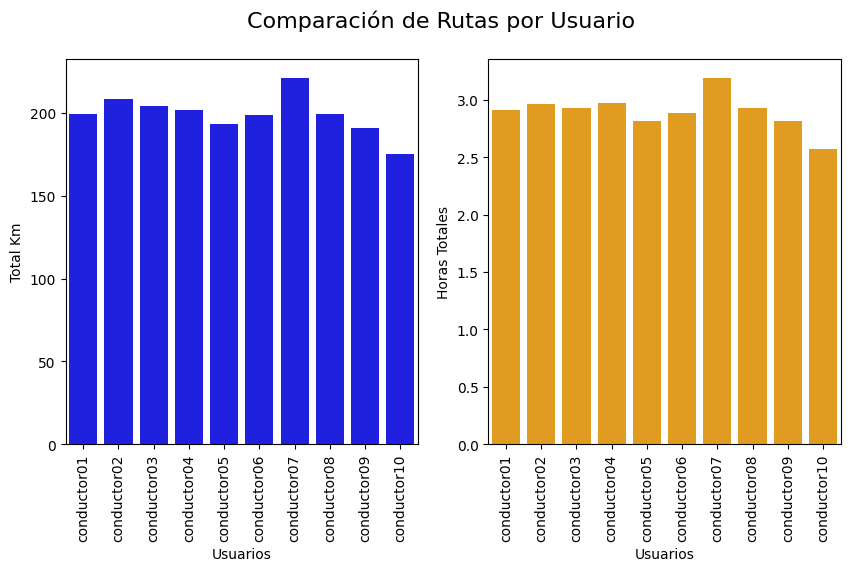

In [82]:
# Plots de Rutas solo de los  5 usuarios
rutas_users['num_conductor'] = rutas_users['usuario'].str.extract('(\d+)').astype(int)
rutas_users_ordenado = rutas_users.sort_values('num_conductor')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=rutas_users_ordenado, x='usuario', y='total_km', color='blue', ax=axes[0], errorbar=None)
axes[0].set_xlabel('Usuarios')
axes[0].set_ylabel('Total Km')
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(data=rutas_users_ordenado, x='usuario', y='horas_totales', color='orange', ax=axes[1], errorbar=None)
axes[1].set_xlabel('Usuarios')
axes[1].set_ylabel('Horas Totales')
axes[1].tick_params(axis='x', rotation=90)


plt.suptitle('Comparación de Rutas por Usuario', fontsize=16);


In [83]:
kmruta = rutas['total_km']
kmruta

0      151.203
1      265.391
2      272.005
3      230.309
4      213.039
        ...   
495    213.836
496    195.440
497    178.190
498    217.017
499    142.842
Name: total_km, Length: 500, dtype: float64

#### Tickets

+ Asociamos un ticket con una ruta y un conductor

In [84]:
tickets = pd.read_csv(path + "tickets_combustible_euskadi_2022-2025.csv")
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud
0,13/06/2024 0:00:00,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,134.0,720,1259.763738,43.212361,-3.126639
1,15/07/2024 0:00:00,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,313.0,1500,2687.719101,43.303444,-3.004222
2,13/01/2024 0:00:00,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,332.0,1250,2261.250000,43.340861,-1.756528
3,27/11/2024 0:00:00,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,137.0,570,541.944636,43.193861,-2.519028
4,01/02/2023 0:00:00,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,281.0,1080,1770.206460,42.845639,-2.741917
...,...,...,...,...,...,...,...,...,...,...,...
366741,20/06/2023 0:00:00,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8,16.0,830,789.147452,43.048694,-2.497500
366742,04/05/2023 0:00:00,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3,98.0,1180,2114.339026,42.670222,-2.357278
366743,04/05/2023 0:00:00,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3,174.0,410,556.362559,43.319444,-2.975750
366744,01/02/2022 0:00:00,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4,133.0,660,1286.340000,43.166722,-2.585250


In [85]:
#La columna Fecha la paso a formato datetime
tickets['Fecha'] = pd.to_datetime(tickets['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
tickets['Año'] = tickets['Fecha'].dt.year
tickets['Mes'] = tickets['Fecha'].dt.month
tickets['Día'] = tickets['Fecha'].dt.day

In [86]:
#Añadimos de rutas las columnas de total_km, matriculas y user_label
tickets['total_km'] = random.choices(rutas_users_ordenado['total_km'].tolist(), k=len(tickets))
tickets['matricula'] = random.choices(rutas_users_ordenado['matricula'].tolist(), k=len(tickets))
tickets['usuario'] = random.choices(rutas_users_ordenado['usuario'].tolist(), k=len(tickets))
tickets['horas_totales'] = random.choices(rutas_users_ordenado['horas_totales'].tolist(), k=len(tickets))

In [87]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,matricula,usuario,horas_totales
0,2024-06-13,Gas Natural Comprimido,1.749672,"(43.212361, -3.126639)",Gas Natural Comprimido,3,134.0,720,1259.763738,43.212361,-3.126639,2024,6,13,159.120,0280 AAA,conductor10,2.814444
1,2024-07-15,Gasoleo B,1.791813,"(43.303444, -3.004222)",Gasoleo B,7,313.0,1500,2687.719101,43.303444,-3.004222,2024,7,15,79.273,0161 AAA,conductor08,2.117222
2,2024-01-13,Gas Natural Licuado,1.809000,"(43.340861, -1.756528)",Gas Natural Licuado,4,332.0,1250,2261.250000,43.340861,-1.756528,2024,1,13,208.810,0086 AAA,conductor10,3.276944
3,2024-11-27,Bioetanol,0.950780,"(43.193861, -2.519028)",Bioetanol,2,137.0,570,541.944636,43.193861,-2.519028,2024,11,27,195.136,0069 AAA,conductor02,2.865278
4,2023-02-01,Gas Natural Comprimido,1.639080,"(42.845639, -2.741917)",Gas Natural Comprimido,3,281.0,1080,1770.206460,42.845639,-2.741917,2023,2,1,90.951,0328 AAA,conductor08,3.295278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,2023-06-20,Gasoleo Premium,0.950780,"(43.048694, -2.4975)",Gasoleo Premium,8,16.0,830,789.147452,43.048694,-2.497500,2023,6,20,250.669,0483 AAA,conductor02,2.750278
366742,2023-05-04,Gas Natural Comprimido,1.791813,"(42.670222, -2.357278)",Gas Natural Comprimido,3,98.0,1180,2114.339026,42.670222,-2.357278,2023,5,4,100.688,0336 AAA,conductor05,3.169167
366743,2023-05-04,Gas Natural Comprimido,1.356982,"(43.319444, -2.97575)",Gas Natural Comprimido,3,174.0,410,556.362559,43.319444,-2.975750,2023,5,4,98.677,0218 AAA,conductor08,2.195833
366744,2022-02-01,Gas Natural Licuado,1.949000,"(43.166722, -2.58525)",Gas Natural Licuado,4,133.0,660,1286.340000,43.166722,-2.585250,2022,2,1,250.653,0232 AAA,conductor05,2.750278


#### Vehículos

+ Agrupamos un vehiculo a un usuario-ruta y consideramos el tipo de combustible usado por un vehiculo de la flota

In [88]:
flotavehiculos = pd.read_csv(path + "df_vehiculos_procesado_kw.csv", sep=',', decimal=',', encoding='utf-8')
flotavehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
3,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
15780,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15781,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15782,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15783,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [89]:
mergetickets_vehiculos = pd.merge(flotavehiculos, tickets, left_on='Matricula', right_on='matricula', how='inner')
mergetickets_vehiculos.head()

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Importe,Latitud,Longitud,Año,Mes,Día,total_km,matricula,usuario,horas_totales
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1715.580610,42.895667,-2.702278,2022,10,20,122.908,0000 AAA,conductor03,4.328889
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,936.317478,43.328500,-3.068806,2023,12,22,203.984,0000 AAA,conductor08,2.306667
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,376.560000,43.294833,-2.258083,2024,5,1,283.456,0000 AAA,conductor04,3.382222
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,731.850000,43.240944,-2.879028,2023,8,3,150.347,0000 AAA,conductor09,1.501389
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1131.428275,43.280111,-2.495722,2023,9,27,212.328,0000 AAA,conductor09,2.641389


In [90]:
columns = ['Coordenadas', 'nombre_carburante', 'matricula']
mergetickets_vehiculos.drop(columns= columns, inplace=True)


In [91]:
mergetickets_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,usuario,horas_totales
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1190,1715.580610,42.895667,-2.702278,2022,10,20,122.908,conductor03,4.328889
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,690,936.317478,43.328500,-3.068806,2023,12,22,203.984,conductor08,2.306667
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,240,376.560000,43.294833,-2.258083,2024,5,1,283.456,conductor04,3.382222
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,410,731.850000,43.240944,-2.879028,2023,8,3,150.347,conductor09,1.501389
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1190,1131.428275,43.280111,-2.495722,2023,9,27,212.328,conductor09,2.641389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,240,422.785496,43.382583,-2.987361,2023,7,29,155.187,conductor01,3.140833
9593,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1250,2136.250000,43.189750,-2.894444,2022,2,22,211.231,conductor05,3.648611
9594,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,620,1110.923895,43.312222,-1.879444,2024,1,4,169.790,conductor10,2.546111
9595,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1320,2143.680000,43.259611,-2.523694,2023,9,19,211.401,conductor06,3.795278


In [92]:
mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Matricula                 9597 non-null   object        
 1   Modelo                    9597 non-null   object        
 2   Clasificación Energética  9597 non-null   object        
 3    Consumo MIN              9597 non-null   object        
 4    Consumo MAX              9597 non-null   object        
 5    Emisiones MIN (gCO2/km)  9597 non-null   object        
 6    Emisiones MAX (gCO2/km)  9597 non-null   object        
 7    Motorización             9597 non-null   object        
 8   kw_minimo                 8843 non-null   object        
 9   kw_maximo                 8843 non-null   object        
 10  Fecha                     9597 non-null   datetime64[ns]
 11  TipoCarburante            9597 non-null   object        
 12  Precio por Litro    

In [93]:
mergetickets_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo', 'Fecha', 'TipoCarburante',
       'Precio por Litro', 'id_carburante', 'id_ES', 'Litros', 'Importe',
       'Latitud', 'Longitud', 'Año', 'Mes', 'Día', 'total_km', 'usuario',
       'horas_totales'],
      dtype='object')

In [94]:
columnas_excluir = ['Matricula', 'Modelo', 'Clasificación Energética',' Motorización', 'Fecha', 'TipoCarburante', 
                     'id_carburante', 'id_ES', 'Año', 'Mes', 'Día', 'total_km', 'usuario']

for col in mergetickets_vehiculos.columns:
    if mergetickets_vehiculos[col].dtype == 'object' and col not in columnas_excluir:
        # to_numeric es más seguro porque maneja errores automáticamente
        mergetickets_vehiculos[col] = pd.to_numeric(mergetickets_vehiculos[col], errors='coerce')

mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Matricula                 9597 non-null   object        
 1   Modelo                    9597 non-null   object        
 2   Clasificación Energética  9597 non-null   object        
 3    Consumo MIN              9597 non-null   float64       
 4    Consumo MAX              9597 non-null   float64       
 5    Emisiones MIN (gCO2/km)  9597 non-null   float64       
 6    Emisiones MAX (gCO2/km)  9597 non-null   float64       
 7    Motorización             9597 non-null   object        
 8   kw_minimo                 8843 non-null   float64       
 9   kw_maximo                 8843 non-null   float64       
 10  Fecha                     9597 non-null   datetime64[ns]
 11  TipoCarburante            9597 non-null   object        
 12  Precio por Litro    

In [95]:
#Gasto en litros e importe por tipo de carburante y año
gasto_carburante = mergetickets_vehiculos.groupby(['Año','Mes', 'TipoCarburante', 'total_km', 'Matricula', 'usuario']).agg({'Litros': 'sum', 'Importe': 'sum', ' Consumo MIN': 'mean', ' Consumo MAX': 'mean'}).reset_index()
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,Consumo MIN,Consumo MAX
0,2022,1,Biodiesel,115.319,0003 AAA,conductor07,920,874.717658,7.1,7.5
1,2022,1,Biodiesel,135.304,0004 AAA,conductor07,1140,1777.260000,7.1,7.5
2,2022,1,Biodiesel,155.384,0012 AAA,conductor10,1270,1840.230000,7.1,7.5
3,2022,1,Biodiesel,159.481,0009 AAA,conductor01,520,916.035242,7.1,7.5
4,2022,1,Biodiesel,163.133,0000 AAA,conductor03,1120,2006.830262,0.4,6.4
...,...,...,...,...,...,...,...,...,...,...
9591,2024,12,Gasolina 98 E5,234.352,0007 AAA,conductor10,260,355.940000,7.1,7.5
9592,2024,12,Gasolina 98 E5,249.514,0007 AAA,conductor09,270,472.230000,7.1,7.5
9593,2024,12,Gasolina 98 E5,265.476,0001 AAA,conductor09,550,1025.110966,0.9,0.9
9594,2024,12,Gasolina 98 E5,270.315,0013 AAA,conductor08,290,476.760000,7.1,7.5


+ Cálculo de consumo según el tipo de vehículo

In [96]:
gasto_carburante['mean_consumo'] = (gasto_carburante[' Consumo MIN'] + gasto_carburante[' Consumo MAX']) / 2
gasto_carburante.drop(columns=[' Consumo MIN', ' Consumo MAX'], inplace=True)
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,mean_consumo
0,2022,1,Biodiesel,115.319,0003 AAA,conductor07,920,874.717658,7.3
1,2022,1,Biodiesel,135.304,0004 AAA,conductor07,1140,1777.260000,7.3
2,2022,1,Biodiesel,155.384,0012 AAA,conductor10,1270,1840.230000,7.3
3,2022,1,Biodiesel,159.481,0009 AAA,conductor01,520,916.035242,7.3
4,2022,1,Biodiesel,163.133,0000 AAA,conductor03,1120,2006.830262,3.4
...,...,...,...,...,...,...,...,...,...
9591,2024,12,Gasolina 98 E5,234.352,0007 AAA,conductor10,260,355.940000,7.3
9592,2024,12,Gasolina 98 E5,249.514,0007 AAA,conductor09,270,472.230000,7.3
9593,2024,12,Gasolina 98 E5,265.476,0001 AAA,conductor09,550,1025.110966,0.9
9594,2024,12,Gasolina 98 E5,270.315,0013 AAA,conductor08,290,476.760000,7.3


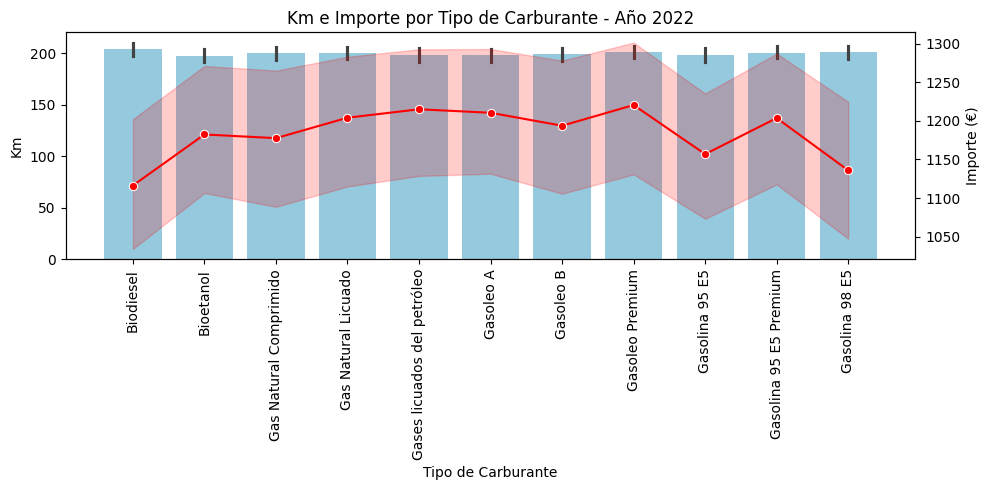

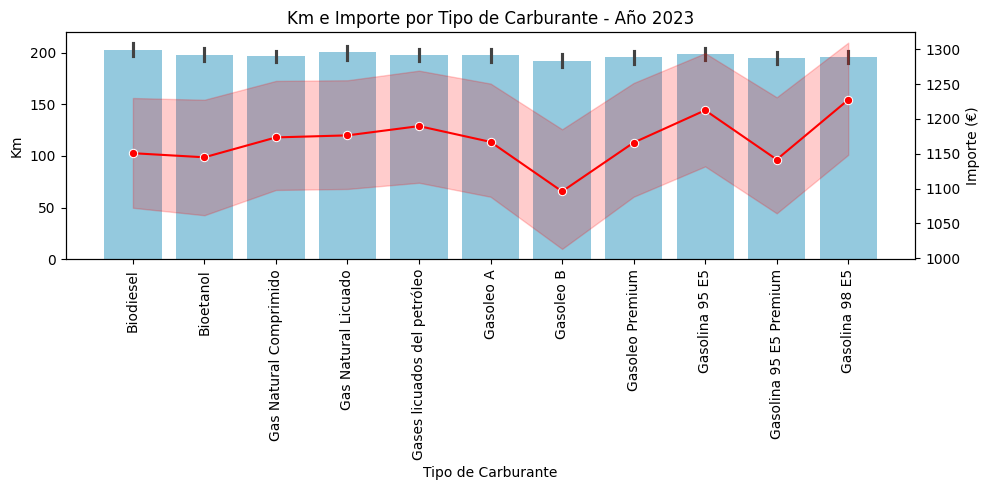

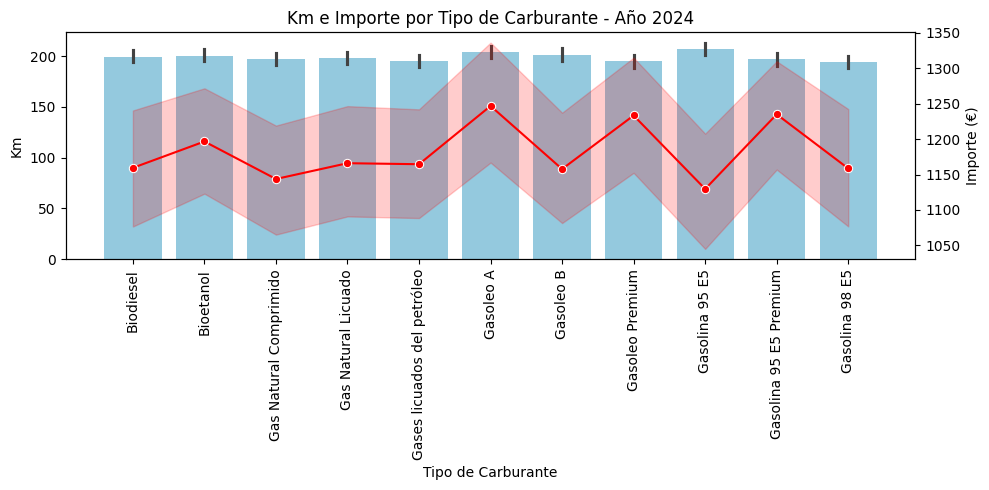

In [97]:
# Gráfico combinado de km (barras) e importe (línea) por tipo de carburante y año
for año in gasto_carburante['Año'].unique():
    df_año = gasto_carburante[gasto_carburante['Año'] == año]
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Barras: Km por tipo de carburante
    sns.barplot(data=df_año, x='TipoCarburante', y='total_km', ax=ax1, color='skyblue')
    ax1.set_ylabel('Km')
    ax1.set_xlabel('Tipo de Carburante')
    ax1.set_title(f'Km e Importe por Tipo de Carburante - Año {año}')
    ax1.tick_params(axis='x', rotation=90)

    # Línea: Importe total por tipo de carburante
    ax2 = ax1.twinx()
    sns.lineplot(data=df_año, x='TipoCarburante', y='Importe', ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Importe (€)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    plt.tight_layout()
    plt.show()
    

In [98]:
#Grafico del año 2024 los gastos por tipo de carburante, litros e importe
df_2024 = mergetickets_vehiculos[mergetickets_vehiculos['Año'] == 2024]
df_2024

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,usuario,horas_totales
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,240,376.560000,43.294833,-2.258083,2024,5,1,283.456,conductor04,3.382222
7,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,830,1360.436446,43.336472,-2.835083,2024,5,4,210.885,conductor02,1.900556
9,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1450,2598.128464,43.166306,-2.595917,2024,6,29,265.391,conductor06,2.107778
10,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,750,1716.750000,43.322583,-1.834722,2024,3,12,253.802,conductor01,3.004167
13,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,840,798.655253,43.273556,-2.274028,2024,3,20,268.679,conductor05,2.095833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1030,1802.162014,43.340861,-1.756528,2024,5,28,186.801,conductor01,2.388333
9573,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,530,719.200382,43.240944,-2.879028,2024,4,30,147.347,conductor10,2.840833
9576,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,500,895.906367,42.966472,-2.873583,2024,7,30,135.542,conductor06,3.400000
9588,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,280,493.249746,42.635194,-2.849833,2024,1,13,166.379,conductor10,3.386944


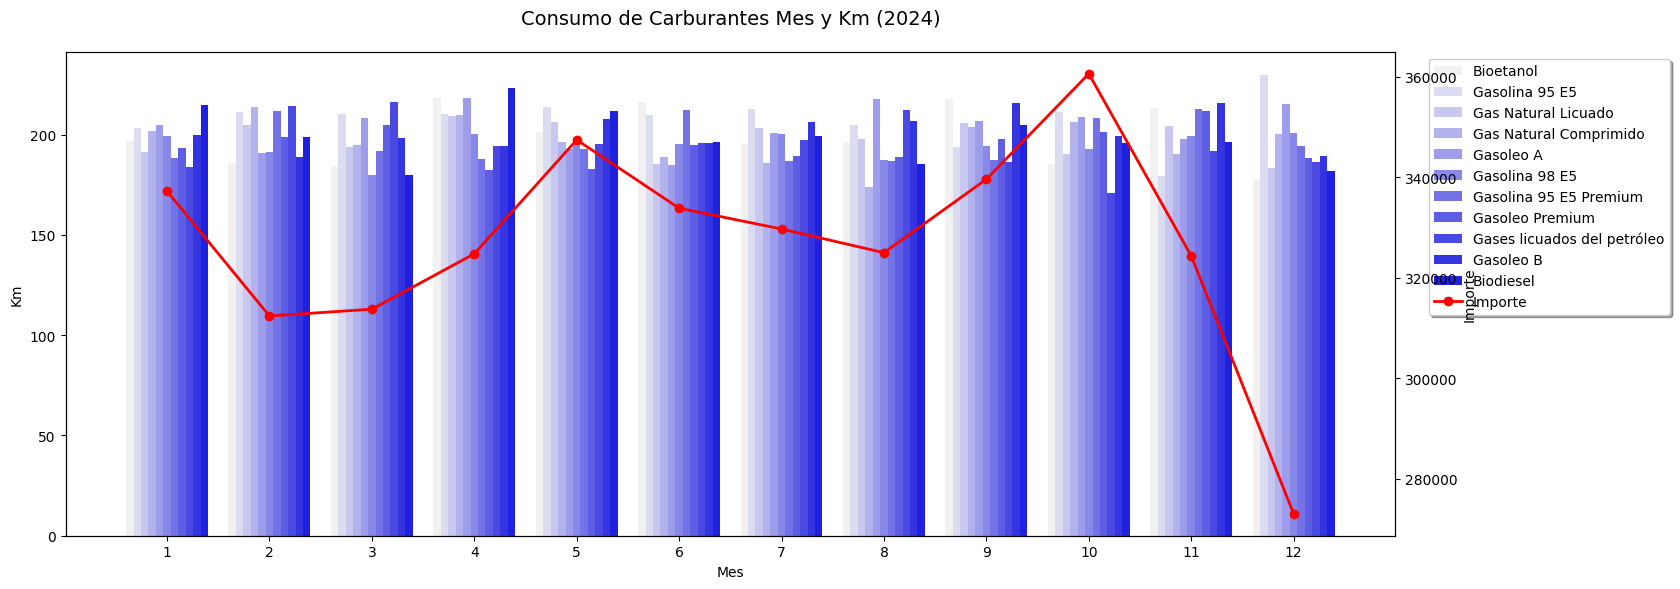

In [99]:
plt.figure(figsize=(14, 6))

ax1 = plt.gca()
sns.barplot(data=df_2024, x='Mes', y='total_km',hue='TipoCarburante', errorbar=None, palette='light:blue',ax=ax1)


ax2 = ax1.twinx()

#  datos por mes y asegurarse de que incluya todos los meses desde 1
df_importe_mes = df_2024.groupby('Mes', as_index=False)['Importe'].sum()


line_plot = ax2.plot(
    df_importe_mes['Mes'] - 1,  # Ajustar posición para alinear con las barras (índice 0-based)
    df_importe_mes['Importe'], 
    color='red', 
    marker='o',
    linewidth=2,
    markersize=6,
    label='Importe'
)


plt.title('Consumo de Carburantes Mes y Km (2024)', fontsize=14, pad=20)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Km')
ax2.set_ylabel('Importe')


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


ax1.get_legend().remove()


ax1.legend(handles1 + handles2, labels1 + labels2, 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)


plt.tight_layout()
plt.subplots_adjust(right=1)  #  espacio a la derecha para la leyenda

plt.show()


#### Tipo de Carburante

In [100]:
combustible = pd.read_csv(path + "df_combustible_precios_euskadi_2022-2025.csv")


In [101]:
combustible['Fecha'] = pd.to_datetime(combustible['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
combustible['Año'] = combustible['Fecha'].dt.year
combustible['Mes'] = combustible['Fecha'].dt.month
combustible['Día'] = combustible['Fecha'].dt.day

In [102]:
combustible_group = combustible.groupby(['Año', 'Mes', 'nombre_carburante']).agg({ 'precio': 'mean', 'energia_kWh': 'mean'}).reset_index()
combustible_group

,Año,Mes,nombre_carburante,precio,energia_kWh
0,2022,1,Biodiesel,1.786852,9.20
1,2022,1,Bioetanol,1.639070,5.90
2,2022,1,Gas Natural Comprimido,1.449318,13.10
3,2022,1,Gas Natural Licuado,1.411236,13.90
4,2022,1,Gases licuados del petróleo,0.938963,6.90
...,...,...,...,...,...
391,2024,12,Gasoleo B,1.331939,10.20
392,2024,12,Gasoleo Premium,1.648500,10.20
393,2024,12,Gasolina 95 E5,1.555840,9.25
394,2024,12,Gasolina 95 E5 Premium,1.749829,9.25


#### Merge de datasets

+ Cálculo del consumo y gasto 

In [110]:
mergedf = pd.merge(combustible_group, mergetickets_vehiculos, left_on=['Año', 'Mes', 'nombre_carburante'],
                   right_on=['Año', 'Mes', 'TipoCarburante'], how="inner")

In [111]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,id_carburante,id_ES,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,88.0,1100,2033.900000,43.039917,-2.420639,7,175.264,conductor06,3.291111
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,176.0,1120,2006.830262,43.130583,-2.548889,5,163.133,conductor03,1.310556
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,208.0,1500,3193.500000,43.339056,-1.764556,13,236.964,conductor08,2.814444
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,35.0,290,540.513055,42.860306,-2.664278,8,250.772,conductor03,2.307500
4,2022,1,Biodiesel,1.786852,9.20,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,1,281.0,1140,1994.625918,42.845639,-2.741917,9,299.136,conductor08,3.743056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024,12,Gasolina 98 E5,1.782658,9.25,0010 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,304.0,1340,1338.660000,43.350472,-3.073861,15,202.026,conductor09,2.958333
9593,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,358.0,10,22.790000,43.286667,-3.002750,20,220.080,conductor10,3.062778
9594,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,322.0,290,476.760000,43.058694,-2.493500,11,270.315,conductor08,3.386944
9595,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,63.0,890,1601.110000,43.294167,-2.340833,27,221.908,conductor02,2.755000


In [112]:
mergedf.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Consumo MIN', ' Consumo MAX',
       ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)', ' Motorización',
       'kw_minimo', 'kw_maximo', 'Fecha', 'TipoCarburante', 'Precio por Litro',
       'id_carburante', 'id_ES', 'Litros', 'Importe', 'Latitud', 'Longitud',
       'Día', 'total_km', 'usuario', 'horas_totales'],
      dtype='object')

+ Consumo medio según el tipo de vehículo

In [113]:
mergedf['consumovehiculomean'] = (mergedf[' Consumo MIN'] + mergedf[' Consumo MAX'] / 2)  * mergedf['total_km']
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,id_ES,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,88.0,1100,2033.900000,43.039917,-2.420639,7,175.264,conductor06,3.291111,630.95040
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,176.0,1120,2006.830262,43.130583,-2.548889,5,163.133,conductor03,1.310556,587.27880
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,208.0,1500,3193.500000,43.339056,-1.764556,13,236.964,conductor08,2.814444,319.90140
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,35.0,290,540.513055,42.860306,-2.664278,8,250.772,conductor03,2.307500,338.54220
4,2022,1,Biodiesel,1.786852,9.20,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,281.0,1140,1994.625918,42.845639,-2.741917,9,299.136,conductor08,3.743056,3245.62560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024,12,Gasolina 98 E5,1.782658,9.25,0010 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,304.0,1340,1338.660000,43.350472,-3.073861,15,202.026,conductor09,2.958333,2191.98210
9593,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,358.0,10,22.790000,43.286667,-3.002750,20,220.080,conductor10,3.062778,2387.86800
9594,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,322.0,290,476.760000,43.058694,-2.493500,11,270.315,conductor08,3.386944,2932.91775
9595,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,63.0,890,1601.110000,43.294167,-2.340833,27,221.908,conductor02,2.755000,2407.70180


In [114]:
mergedf = mergedf.drop(columns=['TipoCarburante', ' Consumo MIN', ' Consumo MAX'])

In [115]:
mergedf.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', ' Motorización', 'kw_minimo', 'kw_maximo',
       'Fecha', 'Precio por Litro', 'id_carburante', 'id_ES', 'Litros',
       'Importe', 'Latitud', 'Longitud', 'Día', 'total_km', 'usuario',
       'horas_totales', 'consumovehiculomean'],
      dtype='object')

In [116]:
mergedf['coste_energetico_vehiculo'] = mergedf['consumovehiculomean'] * mergedf['energia_kWh']
mergedf['emisiones_vehiculo'] = (mergedf[' Emisiones MIN (gCO2/km)'] + mergedf[' Emisiones MAX (gCO2/km)'] /2)
mergedf.head()

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean,coste_energetico_vehiculo,emisiones_vehiculo
0,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,2033.900000,43.039917,-2.420639,7,175.264,conductor06,3.291111,630.9504,5804.74368,82.00
1,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,2006.830262,43.130583,-2.548889,5,163.133,conductor03,1.310556,587.2788,5402.96496,82.00
2,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,3193.500000,43.339056,-1.764556,13,236.964,conductor08,2.814444,319.9014,2943.09288,28.50
3,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,540.513055,42.860306,-2.664278,8,250.772,conductor03,2.307500,338.5422,3114.58824,28.50
4,2022,1,Biodiesel,1.786852,9.2,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,1994.625918,42.845639,-2.741917,9,299.136,conductor08,3.743056,3245.6256,29859.75552,302.55


In [117]:
coste_energetico_anual= mergedf.groupby(['Año', 'nombre_carburante']).agg(km_medio=('total_km', 'mean'),coste_energetico_anual=('coste_energetico_vehiculo', 'sum'))



In [118]:
coste_energetico_anual

km_medio  coste_energetico_anual
Año  nombre_carburante                                              
2022 Biodiesel                    203.593603            4.822798e+06
     Bioetanol                    197.517945            3.322298e+06
     Gas Natural Comprimido       200.129424            6.480289e+06
     Gas Natural Licuado          200.125951            7.782002e+06
     Gases licuados del petróleo  197.941539            3.516358e+06
     Gasoleo A                    197.798184            5.798513e+06
     Gasoleo B                    198.846508            4.938952e+06
     Gasoleo Premium              201.020655            5.184834e+06
     Gasolina 95 E5               198.015415            4.899522e+06
     Gasolina 95 E5 Premium       200.365794            5.168873e+06
     Gasolina 98 E5               200.625570            4.562398e+06
2023 Biodiesel                    202.869374            5.249256e+06
     Bioetanol                    197.825227            3.118550e+06
     Gas Natural Comprimido       196.664852            7.713504e+06
     Gas Natural Licuado          200.174681            7.344525e+06
     Gases licuados del petróleo  197.923049            3.943201e+06
     Gasoleo A                    197.116486            5.578177e+06
     Gasoleo B                    192.188562            5.488881e+06
     Gasoleo Premium              195.599459            5.611151e+06
     Gasolina 95 E5               198.628252            5.391586e+06
     Gasolina 95 E5 Premium       194.600652            4.924223e+06
     Gasolina 98 E5               195.490451            5.252416e+06
2024 Biodiesel                    199.478488            5.221188e+06
     Bioetanol                    200.478036            3.429815e+06
     Gas Natural Comprimido       197.529808            7.724107e+06
     Gas Natural Licuado          197.789174            7.533408e+06
     Gases licuados del petróleo  194.968816            3.986501e+06
     Gasoleo A                    203.611473            5.445517e+06
     Gasoleo B                    201.335846            6.463546e+06
     Gasoleo Premium              194.832770            5.489056e+06
     Gasolina 95 E5               207.281797            5.589738e+06
     Gasolina 95 E5 Premium       196.997862            5.216759e+06
     Gasolina 98 E5               194.246326            5.049264e+06

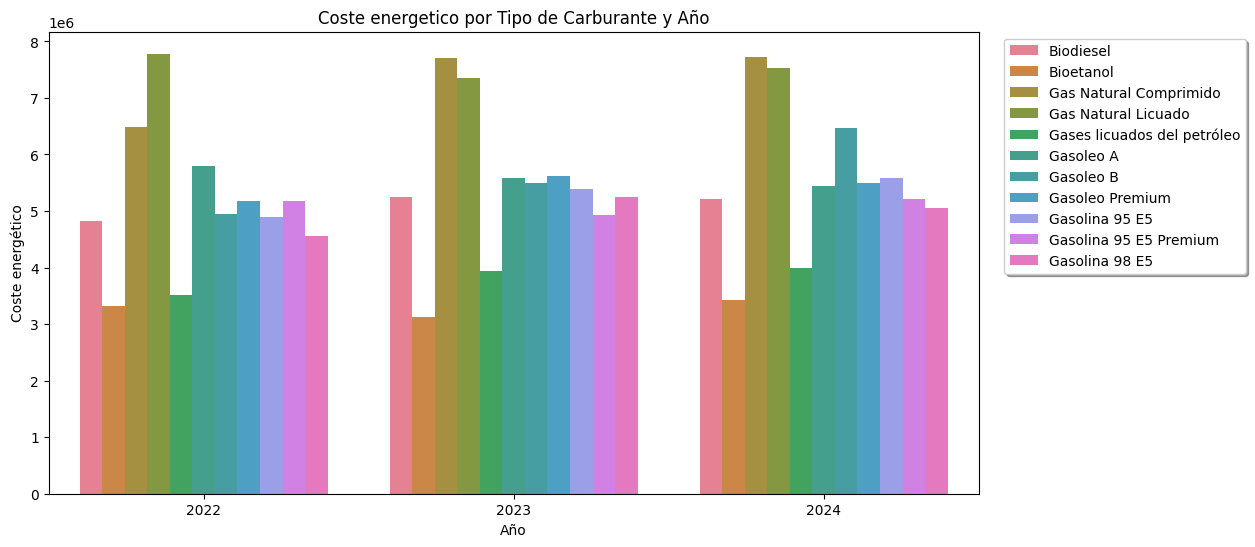

In [119]:
#Plot del coste energetico por tipo de carburante y año
plt.figure(figsize=(12, 6))
sns.barplot(data=coste_energetico_anual, x='Año', y='coste_energetico_anual', hue='nombre_carburante')
plt.title('Coste energetico por Tipo de Carburante y Año')
plt.xlabel('Año')
plt.ylabel('Coste energético')
plt.legend(title='Tipo de Carburante')
plt.legend( 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)
plt.show()

# MODELO 1: Predicción del consumo

In [120]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean,coste_energetico_vehiculo,emisiones_vehiculo
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,2033.900000,43.039917,-2.420639,7,175.264,conductor06,3.291111,630.95040,5804.743680,82.00
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,2006.830262,43.130583,-2.548889,5,163.133,conductor03,1.310556,587.27880,5402.964960,82.00
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,3193.500000,43.339056,-1.764556,13,236.964,conductor08,2.814444,319.90140,2943.092880,28.50
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,540.513055,42.860306,-2.664278,8,250.772,conductor03,2.307500,338.54220,3114.588240,28.50
4,2022,1,Biodiesel,1.786852,9.20,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,1994.625918,42.845639,-2.741917,9,299.136,conductor08,3.743056,3245.62560,29859.755520,302.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024,12,Gasolina 98 E5,1.782658,9.25,0010 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,1338.660000,43.350472,-3.073861,15,202.026,conductor09,2.958333,2191.98210,20275.834425,302.55
9593,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,22.790000,43.286667,-3.002750,20,220.080,conductor10,3.062778,2387.86800,22087.779000,302.55
9594,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,476.760000,43.058694,-2.493500,11,270.315,conductor08,3.386944,2932.91775,27129.489187,302.55
9595,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,1601.110000,43.294167,-2.340833,27,221.908,conductor02,2.755000,2407.70180,22271.241650,302.55


In [121]:
dfcopy = mergedf.copy()

In [122]:
dfcopy.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', ' Motorización', 'kw_minimo', 'kw_maximo',
       'Fecha', 'Precio por Litro', 'id_carburante', 'id_ES', 'Litros',
       'Importe', 'Latitud', 'Longitud', 'Día', 'total_km', 'usuario',
       'horas_totales', 'consumovehiculomean', 'coste_energetico_vehiculo',
       'emisiones_vehiculo'],
      dtype='object')

In [143]:
object_columns = dfcopy.select_dtypes(include='object').columns.tolist()
print(object_columns)

['nombre_carburante', 'Matricula', 'Modelo', 'Clasificación Energética', ' Motorización', 'usuario']


In [144]:
encoders = {}
for col in dfcopy.select_dtypes(include='object').columns:
    le = LabelEncoder()
    dfcopy['enc_' + col] = le.fit_transform(dfcopy[col])
    encoders[col] = le  # Guardamos el encoder para cada columna

# Codificamos la fecha por separado
le_fecha = LabelEncoder()
dfcopy['enc_fecha'] = le_fecha.fit_transform(dfcopy['Fecha'].astype(str))
encoders['Fecha'] = le_fecha

# Ahora puedes acceder a las clases de 'nombre_carburante'
for i, label in enumerate(encoders['nombre_carburante'].classes_):
    print(f"{i}: {label}")


0: Biodiesel
1: Bioetanol
2: Gas Natural Comprimido
3: Gas Natural Licuado
4: Gases licuados del petróleo
5: Gasoleo A
6: Gasoleo B
7: Gasoleo Premium
8: Gasolina 95 E5
9: Gasolina 95 E5 Premium
10: Gasolina 98 E5


In [145]:

dfcopy.head()


,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,consumovehiculomean,coste_energetico_vehiculo,emisiones_vehiculo,enc_nombre_carburante,enc_Matricula,enc_Modelo,enc_Clasificación Energética,enc_ Motorización,enc_usuario,enc_fecha
0,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,630.9504,5804.74368,82.00,0,0,1,0,0,5,6
1,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,587.2788,5402.96496,82.00,0,0,1,0,0,2,4
2,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,319.9014,2943.09288,28.50,0,1,0,0,0,7,12
3,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,338.5422,3114.58824,28.50,0,1,0,0,0,2,7
4,2022,1,Biodiesel,1.786852,9.2,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,3245.6256,29859.75552,302.55,0,2,2,1,0,7,8


In [146]:
columns = ['nombre_carburante', 'Matricula', 'Modelo', 'Clasificación Energética',
' Motorización', 'usuario', 'Fecha']

df= dfcopy.drop(columns = columns)


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           9597 non-null   int32  
 1   Mes                           9597 non-null   int32  
 2   precio                        9597 non-null   float64
 3   energia_kWh                   9597 non-null   float64
 4    Emisiones MIN (gCO2/km)      9597 non-null   float64
 5    Emisiones MAX (gCO2/km)      9597 non-null   float64
 6   kw_minimo                     8843 non-null   float64
 7   kw_maximo                     8843 non-null   float64
 8   Precio por Litro              9597 non-null   float64
 9   id_carburante                 9597 non-null   int64  
 10  id_ES                         9327 non-null   float64
 11  Litros                        9597 non-null   int64  
 12  Importe                       9597 non-null   float64
 13  Lat

In [127]:
df.isna().sum()

Año                               0
Mes                               0
precio                            0
energia_kWh                       0
 Emisiones MIN (gCO2/km)          0
 Emisiones MAX (gCO2/km)          0
kw_minimo                       754
kw_maximo                       754
Precio por Litro                  0
id_carburante                     0
id_ES                           270
Litros                            0
Importe                           0
Latitud                           0
Longitud                          0
Día                               0
total_km                          0
horas_totales                     0
consumovehiculomean               0
coste_energetico_vehiculo         0
emisiones_vehiculo                0
enc_nombre_carburante             0
enc_Matricula                     0
enc_Modelo                        0
enc_Clasificación Energética      0
enc_ Motorización                 0
enc_usuario                       0
enc_fecha                   

In [128]:
df = df.dropna()

In [129]:
df.isna().sum()

Año                             0
Mes                             0
precio                          0
energia_kWh                     0
 Emisiones MIN (gCO2/km)        0
 Emisiones MAX (gCO2/km)        0
kw_minimo                       0
kw_maximo                       0
Precio por Litro                0
id_carburante                   0
id_ES                           0
Litros                          0
Importe                         0
Latitud                         0
Longitud                        0
Día                             0
total_km                        0
horas_totales                   0
consumovehiculomean             0
coste_energetico_vehiculo       0
emisiones_vehiculo              0
enc_nombre_carburante           0
enc_Matricula                   0
enc_Modelo                      0
enc_Clasificación Energética    0
enc_ Motorización               0
enc_usuario                     0
enc_fecha                       0
dtype: int64

In [130]:
Target = df['consumovehiculomean']
Features = df.drop(columns = 'consumovehiculomean')

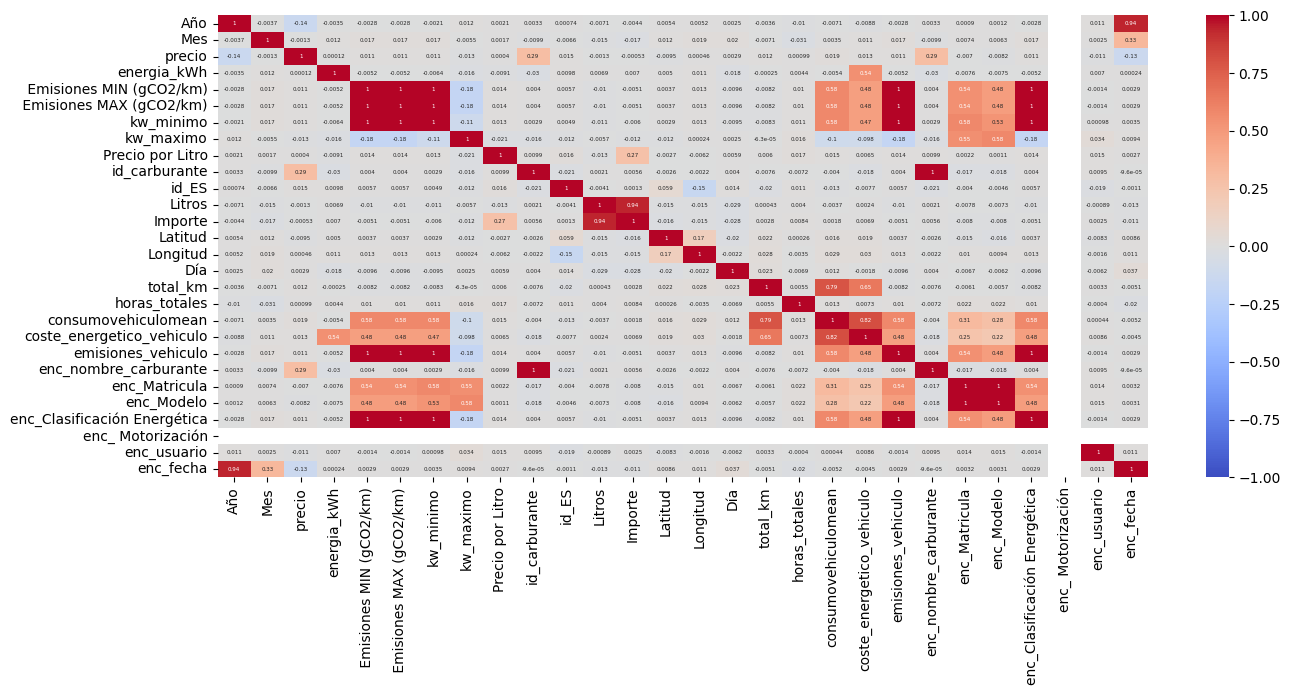

In [131]:
#Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot_kws={'fontsize': 4},vmin=-1, vmax=1, cmap ="coolwarm", annot=True);

In [132]:

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=42, shuffle=True)

print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)
print('\nX_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)


print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
names = Features.columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Features, Target)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
feature_importance_df = pd.DataFrame(scores, columns=['Score', 'Feature'])
print(feature_importance_df)

# Define models to compare (no encoding needed since data is already encoded)
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR())
    ])
}

# Compare models using cross-validation
print("\n=== MODEL COMPARISON RESULTS ===")
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    scores = cross_validate(model, Features, Target, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {
        'R2_mean': scores['test_r2'].mean(),
        'R2_std': scores['test_r2'].std(),
        'MSE_mean': -scores['test_neg_mean_squared_error'].mean(),
        'MSE_std': scores['test_neg_mean_squared_error'].std(),
        'MAE_mean': -scores['test_neg_mean_absolute_error'].mean(),
        'MAE_std': scores['test_neg_mean_absolute_error'].std()
    }

# Display results in a nice format
results_df = pd.DataFrame(results).T.round(4)
print("\n=== FINAL RESULTS SUMMARY ===")
print(results_df)

# Find best model based on R2 score
best_model = results_df['R2_mean'].idxmax()
best_r2 = results_df.loc[best_model, 'R2_mean']
print(f"\nBest Model: {best_model} with R² = {best_r2}")

# Show top 10 most important features
print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance_df.head(10))

X_train_shape:  (6875, 27)
y_train_shape:  (6875,)

X_test_shape:  (1719, 27)
y_test_shape:  (1719,)

=== FEATURE IMPORTANCE ANALYSIS ===
     Score                       Feature
0   0.5070     coste_energetico_vehiculo
1   0.4247                      total_km
2   0.0137                    enc_Modelo
3   0.0117  enc_Clasificación Energética
4   0.0092                     kw_minimo
5   0.0081       Emisiones MAX (gCO2/km)
6   0.0072                   energia_kWh
7   0.0070                 enc_Matricula
8   0.0063       Emisiones MIN (gCO2/km)
9   0.0052            emisiones_vehiculo
10  0.0000                        precio
11  0.0000                     kw_maximo
12  0.0000                 id_carburante
13  0.0000                         id_ES
14  0.0000                 horas_totales
15  0.0000                   enc_usuario
16  0.0000         enc_nombre_carburante
17  0.0000                     enc_fecha
18  0.0000             enc_ Motorización
19  0.0000              Precio por Litro
2

+ Nos quedamos con un linear regressor que tiene Rscore de 0.98 porque el RF nos da overfitting (Rscore = 1)
+ Las features importance son el coste energético del vehiculo y los km totales

In [139]:
# Save the trained model
import os
import joblib

# Create models directory
os.makedirs('../models', exist_ok=True)

# Keep only the top 2 most important features
top_features = ['coste_energetico_vehiculo', 'total_km']
Features_top = Features[top_features]

# Train the Linear Regression model on the reduced dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
best_model.fit(Features_top, Target)

# Save the best model (Linear Regression pipeline)
joblib.dump(best_model, '../models/best_model.pkl')

# Also save the feature columns for reference
feature_cols = list(Features_top.columns)
joblib.dump(feature_cols, '../models/feature_columns.pkl')

print(f"\nBest model (Linear Regression) with top 2 features saved successfully.")
print(f"Features used: {feature_cols}")
print(f"Feature columns saved for reference.")




Best model (Linear Regression) with top 2 features saved successfully.
Features used: ['coste_energetico_vehiculo', 'total_km']
Feature columns saved for reference.


# MODELO 2: Predicción del gasto mensual

In [134]:
df.columns

Index(['Año', 'Mes', 'precio', 'energia_kWh', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', 'kw_minimo', 'kw_maximo',
       'Precio por Litro', 'id_carburante', 'id_ES', 'Litros', 'Importe',
       'Latitud', 'Longitud', 'Día', 'total_km', 'horas_totales',
       'consumovehiculomean', 'coste_energetico_vehiculo',
       'emisiones_vehiculo', 'enc_nombre_carburante', 'enc_Matricula',
       'enc_Modelo', 'enc_Clasificación Energética', 'enc_ Motorización',
       'enc_usuario', 'enc_fecha'],
      dtype='object')

In [135]:
# Target and Features

Target = df['precio']
Features = df.drop(columns = ['precio', 'id_carburante'])

# Split the data (data is already encoded)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=42, shuffle=True)

print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)
print('\nX_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)

# Feature importance analysis using Random Forest
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
names = Features.columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Features, Target)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
feature_importance_df = pd.DataFrame(scores, columns=['Score', 'Feature'])
print(feature_importance_df)

# Define models to compare (no encoding needed since data is already encoded)
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR())
    ])
}

# Compare models using cross-validation
print("\n=== MODEL COMPARISON RESULTS ===")
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    scores = cross_validate(model, Features, Target, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {
        'R2_mean': scores['test_r2'].mean(),
        'R2_std': scores['test_r2'].std(),
        'MSE_mean': -scores['test_neg_mean_squared_error'].mean(),
        'MSE_std': scores['test_neg_mean_squared_error'].std(),
        'MAE_mean': -scores['test_neg_mean_absolute_error'].mean(),
        'MAE_std': scores['test_neg_mean_absolute_error'].std()
    }

# Display results in a nice format
results_df = pd.DataFrame(results).T.round(4)
print("\n=== FINAL RESULTS SUMMARY ===")
print(results_df)

# Find best model based on R2 score
best_model = results_df['R2_mean'].idxmax()
best_r2 = results_df.loc[best_model, 'R2_mean']
print(f"\nBest Model: {best_model} with R² = {best_r2}")

# Show top 10 most important features
print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance_df.head(10))

X_train_shape:  (6875, 26)
y_train_shape:  (6875,)

X_test_shape:  (1719, 26)
y_test_shape:  (1719,)

=== FEATURE IMPORTANCE ANALYSIS ===
     Score                       Feature
0   0.5969         enc_nombre_carburante
1   0.3208                   energia_kWh
2   0.0707                     enc_fecha
3   0.0115                           Mes
4   0.0001                           Año
5   0.0000                      total_km
6   0.0000                     kw_minimo
7   0.0000                     kw_maximo
8   0.0000                         id_ES
9   0.0000                 horas_totales
10  0.0000                   enc_usuario
11  0.0000                    enc_Modelo
12  0.0000                 enc_Matricula
13  0.0000  enc_Clasificación Energética
14  0.0000             enc_ Motorización
15  0.0000            emisiones_vehiculo
16  0.0000     coste_energetico_vehiculo
17  0.0000           consumovehiculomean
18  0.0000              Precio por Litro
19  0.0000                      Longitud
2

In [137]:
# Save the trained model
import os
import joblib

# Create models directory
os.makedirs('../models', exist_ok=True)

# Keep only the top 2 most important features
top_features = ['enc_nombre_carburante', 'energia_kWh']
Features_top = Features[top_features]

# Train the Linear Regression model on the reduced dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])
best_model.fit(Features_top, Target)

# Save the best model 
joblib.dump(best_model, '../models/best_model2.pkl')

# Also save the feature columns for reference
feature_cols = list(Features_top.columns)
joblib.dump(feature_cols, '../models/feature_columns2.pkl')

print(f"\nBest model (Linear Regression) with top 2 features saved successfully.")
print(f"Features used: {feature_cols}")
print(f"Feature columns saved for reference.")




Best model (Linear Regression) with top 2 features saved successfully.
Features used: ['enc_nombre_carburante', 'energia_kWh']
Feature columns saved for reference.


# Modelo 3: Predicción del gasolinera más barata

In [3]:
gasolineras_precios_df = pd.read_csv(path + 'gasolineras_precios_limpio.csv')

# Convertir la columna Fecha a tipo datetime.date (detecta automáticamente YYYY-MM-DD)
gasolineras_precios_df['Fecha'] = pd.to_datetime(gasolineras_precios_df['Fecha']).dt.date

# Verificar primeras filas
print(gasolineras_precios_df.head())
print("Número de filas:", len(gasolineras_precios_df))

     Rotulo  Longitud    Latitud   Horario       Fecha Nombre_Carburante  \
0  MERKAOIL -1.879944  43.323611  L-D: 24H  2022-01-01         Biodiesel   
1  MERKAOIL -1.879944  43.323611  L-D: 24H  2022-01-02         Biodiesel   
2  MERKAOIL -1.879944  43.323611  L-D: 24H  2022-01-03         Biodiesel   
3  MERKAOIL -1.879944  43.323611  L-D: 24H  2022-01-04         Biodiesel   
4  MERKAOIL -1.879944  43.323611  L-D: 24H  2022-01-05         Biodiesel   

     precio  
0  1.791813  
1  1.791813  
2  1.791813  
3  1.791813  
4  1.791813  
Número de filas: 3933380


In [4]:
df = gasolineras_precios_df.copy()

# Descomponer la fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df['DiaSemana'] = df['Fecha'].dt.dayofweek

# Variables de entrada y salida
X = df[['Rotulo','Latitud','Longitud','Nombre_Carburante','Año','Mes','Dia','DiaSemana']]
y = df['precio']

# Columnas categóricas y numéricas
cat_cols = ['Rotulo','Nombre_Carburante']
num_cols = ['Latitud','Longitud','Año','Mes','Dia','DiaSemana']

# Preprocesador: OneHot para categóricas, passthrough numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Nombre_Carburante']),
        ('num', 'passthrough', ['Latitud','Longitud','Año','Mes','Dia','DiaSemana'])
    ]
)

# Pipeline con RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=50, 
        max_depth=10,
        n_jobs=-1, 
        random_state=42
    ))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar
model.fit(X_train, y_train)

# Evaluar
print("R^2 en test:", model.score(X_test, y_test))

R^2 en test: 0.9530082352950502


In [9]:
joblib.dump(model, "../models/modelo_gasolineras.pkl")
print("✅ Modelo guardado en '../models/modelo_gasolineras.pkl'")

✅ Modelo guardado en '../models/modelo_gasolineras.pkl'
